## What is a WordCloud?

Another interesting quick analysis would be a take a peak on a “cloud of words” or "bag of words" generated from a list of tweets. For that, we will use word_cloud, a little word cloud generator in Python. Read more about it on the blog post or the website.
First, install wordcloud:
> python -m pip install wordcloud

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In this example, I have used the Sudan Tweets we looked at previously and created a visual representation of the words majorly used in the tweets.

In [76]:
#Extract textfields from tweets
raw_tweets = df['text']

In [77]:
#Get timeline 
raw_tweets.head()

0    #Breaking: #Sudan deal reached? https://t.co/m...
1    POLITICS-Sudan military council, opposition re...
2    #Sudan "Your hands off brave Sudanese journali...
3    #BreakingNews | Sudan Military Rulers, Opposit...
4    Images of tonight protests in Sinnar city, abo...
Name: text, dtype: object

In [78]:
#Create a string form of our list of text
raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [79]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

In [80]:
words

['breaking',
 'sudan',
 'deal',
 'reached',
 'military',
 'council',
 'opposition',
 'reach',
 'powersharing',
 'agreement',
 'sources',
 'sudan',
 'hands',
 'brave',
 'sudanese',
 'journalist',
 'suhair',
 'abdelraheemabove',
 'poster',
 'nationwide',
 'solidarity',
 'sudan',
 'military',
 'rulers',
 'opposition',
 'reach',
 'powersharing',
 'agreement',
 'mediatorssudan',
 'sudanuprising',
 'tonight',
 'protests',
 'sinnar',
 'city',
 'kilometers',
 'south',
 'khartoum',
 'sudan',
 'tmc',
 'continues',
 'unde',
 'reported',
 'hamadoak',
 'proposed',
 'prime',
 'minister',
 'holds',
 'dual',
 'nationality',
 'british',
 'will',
 'uae',
 'sudans',
 'bashir',
 'destined',
 'fall',
 'morning',
 'trending',
 'topics',
 'sudanesetweeps',
 'sudan',
 'july',
 'amsudans',
 'military',
 'council',
 'protesters',
 'reach',
 'agreement',
 'transition',
 'period',
 'sudan',
 'civilunrest',
 'politics',
 'bullshitsudanurgent',
 'sudan',
 'military',
 'council',
 'opposition',
 'reach',
 'powershar

In [60]:
print(len(words))

7793


In [81]:
wc = WordCloud(background_color="white", max_words=2000)
clean_string = ','.join(words)
wc.generate(clean_string)

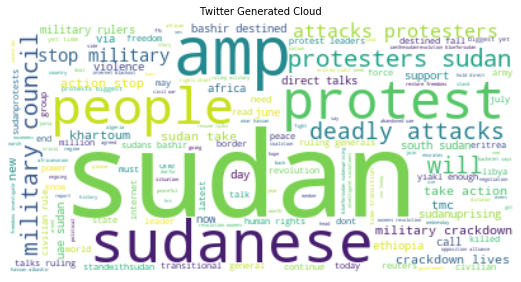

In [82]:
f = plt.figure(figsize=(20,20))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=10)
plt.axis("off")
plt.show()

I did another WordCloud but this time on SkyNews. Here goes:

In [66]:
#Get timeline 
user_timeline=twitter.get_user_timeline(screen_name='SkyNews',count=1) 
#get most recent id
last_id = user_timeline[0]['id']-1
for i in range(16):
    batch = twitter.get_user_timeline(screen_name='SkyNews',count=2000, max_id=last_id)
    user_timeline.extend(batch)
    last_id = user_timeline[-1]['id'] - 1

In [67]:
#Extract textfields from tweets
raw_tweets = []
for tweets in user_timeline:
    raw_tweets.append(tweets['text'])

In [68]:
#Create a string form of our list of text
raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [69]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

In [70]:
words

['trump',
 'britains',
 'ambassador',
 'served',
 'well',
 'shooting',
 'two',
 'arrested',
 'suspicion',
 'murder',
 'man',
 'killed',
 'snooker',
 'club',
 'icon',
 'steviewonder',
 'told',
 'fans',
 'show',
 'hyde',
 'park',
 'central',
 'london',
 'undergo',
 'kidney',
 'hunt',
 'driver',
 'girl',
 'dies',
 'five',
 'hurt',
 'crash',
 'setback',
 'saudis',
 'scrap',
 'order',
 'max',
 'planes',
 'star',
 'mattgoss',
 'falls',
 'stage',
 'performing',
 'one',
 'bands',
 'biggest',
 'hits',
 'will',
 'famous',
 'dur',
 'rather',
 'later',
 'mcdonnell',
 'wants',
 'labour',
 'proremain',
 'hunt',
 'brinksmat',
 'gold',
 'continuesin',
 'part',
 'two',
 'case',
 'takes',
 'flying',
 'squad',
 'detectives',
 'overseas',
 'least',
 'people',
 'injured',
 'suspected',
 'gas',
 'explosion',
 'fountains',
 'shopping',
 'centre',
 'floridato',
 'evacuated',
 'frankfurt',
 'wwii',
 'bomb',
 'defused',
 'usa',
 'beaten',
 'netherlands',
 'win',
 'womensworldcup',
 'hospital',
 'chemical',
 'in

In [71]:
wc = WordCloud(background_color="white", max_words=2000)
clean_string = ','.join(words)
wc.generate(clean_string)

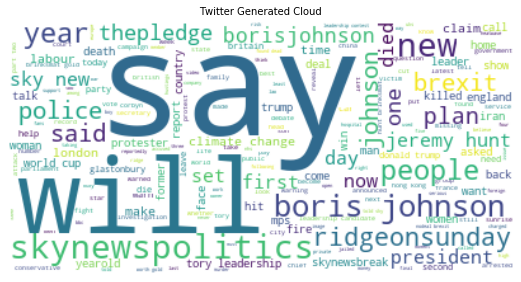

In [73]:
f = plt.figure(figsize=(20,20))
f.add_subplot(1,2, 1)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=10)
plt.axis("off")
plt.show()

I ran the SkyNews analysis on 12th June 2019. Disappointed to say that the one news channel that I regularly listen to, had no major news about Sudan Massacres!

### References:
- https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
- https://towardsdatascience.com/almost-real-time-twitter-sentiment-analysis-with-tweep-vader-f88ed5b93b1c